#I: Langevin Dynamics Sampling


##1. Create the Distribution

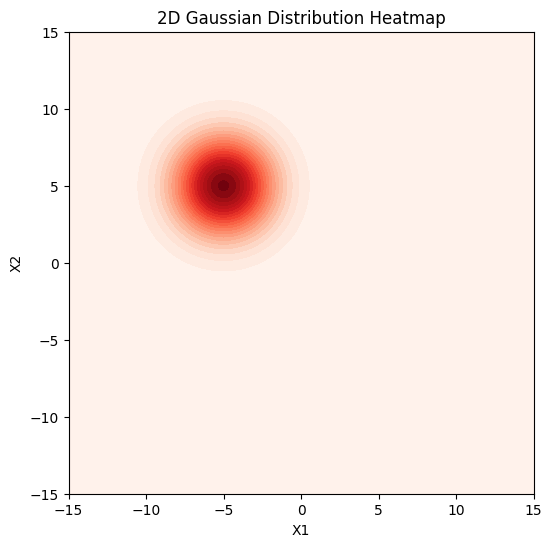

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean = np.array([-5, 5])
cov = 5 * np.eye(2)


def plot_distribution(plt, mean, cov):
    x, y = np.meshgrid(np.linspace(-15, 15, 2000), np.linspace(-15, 15, 2000))
    pos = np.dstack((x, y))

    rv = multivariate_normal(mean, cov)
    pdf = rv.pdf(pos)


    plt.contourf(x, y, pdf, levels=30, cmap="Reds")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("2D Gaussian Distribution Heatmap")
    plt.grid(False)

plt.figure(figsize=(6, 6))
plot_distribution(plt, mean, cov)
plt.show()


##2. Calculate the Score Function Theoretically

First, Let's start from the probability density function. We have :<br>

*  $p(x) = \frac{1}{Z(θ)}e^{(-\frac{1}{2}(x-μ)^TΣ^{-1}(x-μ))}$<br>

*   $μ = (-5,5)$
*   $Σ = \begin{bmatrix}
    5       & 0 \\
    0       & 5
\end{bmatrix}$


*   $\log p(x) - \log Z(θ) = -\frac{1}{2}(x-μ)^TΣ^{-1}(x-μ) = -\frac{1}{2} \times \begin{bmatrix}x_1+5 \\ x_2-5 \end{bmatrix} \begin{bmatrix}\frac{1}{5} & 0 \\ 0 & \frac{1}{5} \end{bmatrix} \begin{bmatrix} x_1+5 & x_2-5  \end{bmatrix}$<br>
$= -\frac{1}{2} \times \begin{bmatrix}\frac{x_1+5}{5} \\ \frac{x_2-5}{5} \end{bmatrix} \begin{bmatrix} x_1+5 & x_2-5  \end{bmatrix}= \begin{bmatrix} \frac{(x_1+5)^2}{-10} & \frac{(x_2-5)^2}{-10} \end{bmatrix}$<br>

*   $⇒ \log p(x) = \log Z(θ) + \begin{bmatrix} \frac{(x_1+5)^2}{-10} & \frac{(x_2-5)^2}{-10} \end{bmatrix}$

*   $⇒ \nabla_x \log p(x) = \begin{bmatrix} 0 & 0 \end{bmatrix} + \begin{bmatrix} \frac{ 2 \times (x_1+5)}{-10} & \frac{2\times (x_2-5)}{-10} \end{bmatrix} =\begin{bmatrix} \frac{  -(x_1+5)}{5} & \frac{ -(x_2-5)}{5} \end{bmatrix} $<br>
*   $⇒ \nabla_x \log p(x) = -\frac{1}{5}(x-[5 , -5 ])$

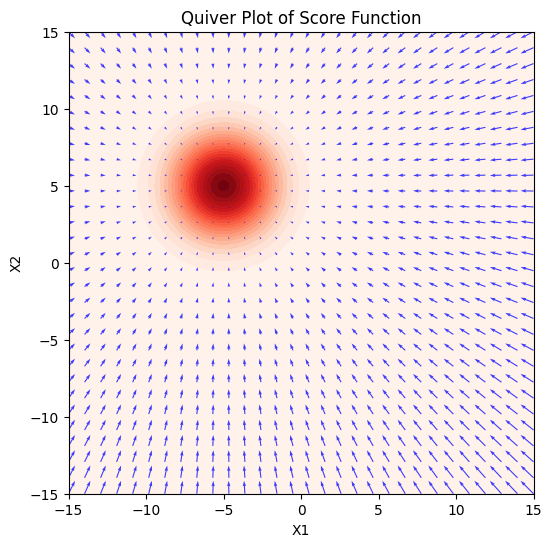

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_the_score_function(plt, dpdx1, dpdx2):
    plt.quiver(X, Y, dpdx1, dpdx2, color="blue", alpha=0.75)
    plt.title("Quiver Plot of Score Function")

x_vals = np.linspace(-15, 15, 30)
y_vals = np.linspace(-15, 15, 30)
X, Y = np.meshgrid(x_vals, y_vals)

dpdx1 = -0.2 * (X + 5)
dpdx2 = -0.2 * (Y - 5)


plt.figure(figsize=(6, 6))
plot_distribution(plt, mean, cov)
plot_the_score_function(plt, dpdx1, dpdx2)
plt.show()

In [ ]:
def get_S(points):
    transformed = np.zeros_like(points, dtype=float)
    transformed[:, 0] = (-0.2)*(points[:, 0] + 5)
    transformed[:, 1] = (-0.2)*(points[:, 1] - 5)

    return transformed

def get_z(points):
    return np.random.randn(*points.shape)

def langevin_step(points, eps):
    transformed = np.zeros_like(points, dtype=float)
    z = get_z(points)
    s = get_S(points)
    return  points + eps * s +  np.sqrt(eps * 2) * z

def langevin_sampling(points, eps, steps):
    for i in range(steps):
        new_points = langevin_step(points[-1], eps)
        points = np.concatenate((points, [new_points]), axis=0)
    return points

In [ ]:
output = langevin_sampling(np.array([[[10, -10],[-10,-10 ], [10,10 ]]]), .5, 15)

print(output[-1])

[[-0.17471973  1.99508643]
 [-5.33925522  4.10544109]
 [-0.41897704  4.54342264]]


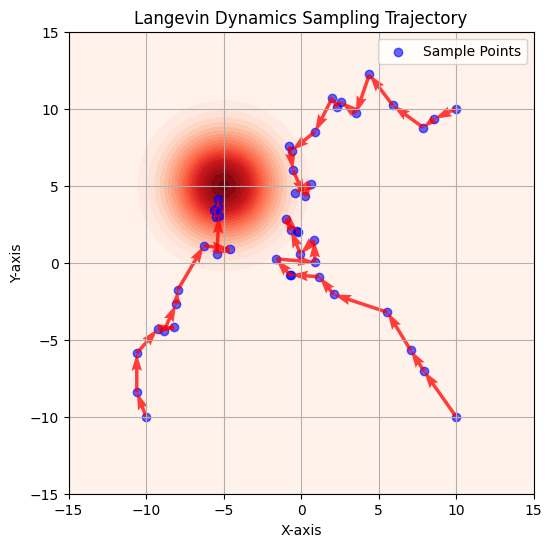

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_langevin_trajectory(plt, points):

    time_steps, num_points, _ = points.shape



    for i in range(num_points):
        x = points[:, i, 0]
        y = points[:, i, 1]

        plt.scatter(x, y, color="blue", alpha=0.6, label="Sample Points" if i == 0 else "")

        dx = np.diff(x)
        dy = np.diff(y)
        plt.quiver(x[:-1], y[:-1], dx, dy, angles="xy", scale_units="xy", scale=1, color="red",  alpha=0.75)

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Langevin Dynamics Sampling Trajectory")
    plt.grid()
    plt.legend()

plt.figure(figsize=(6, 6))
plot_distribution(plt, mean, cov)
plot_langevin_trajectory(plt, output)
plt.show()



In [ ]:
def generate_initial_samples(n_samples=1000, low=-1000, high=1000):
    return np.random.uniform(low, high, size=(n_samples, 2))

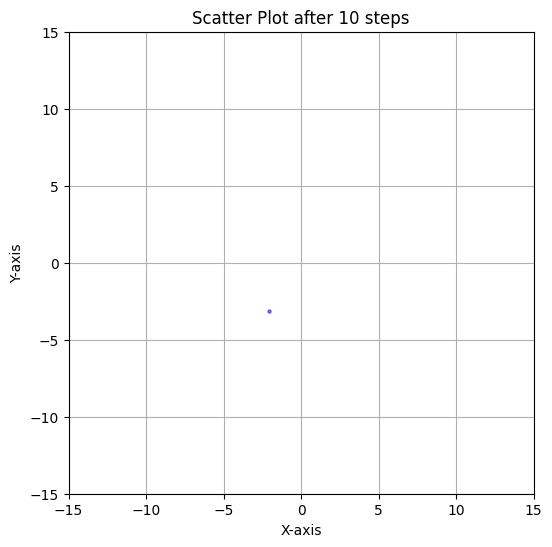

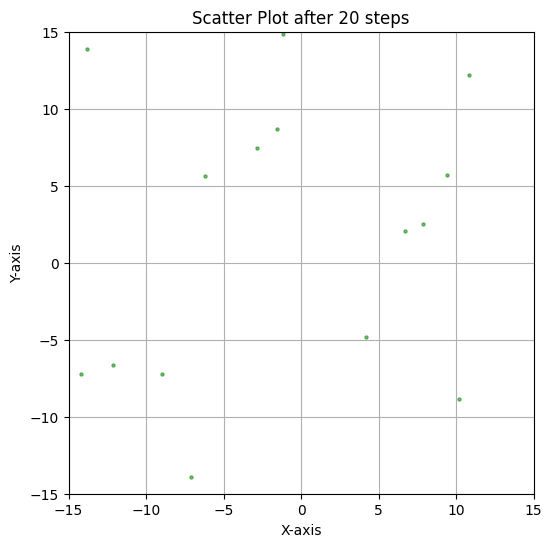

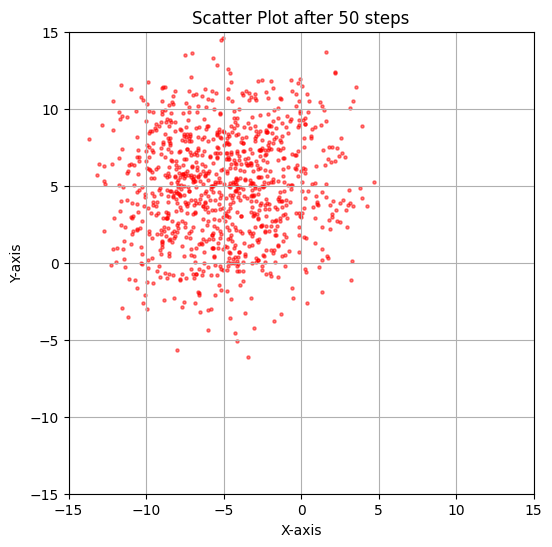

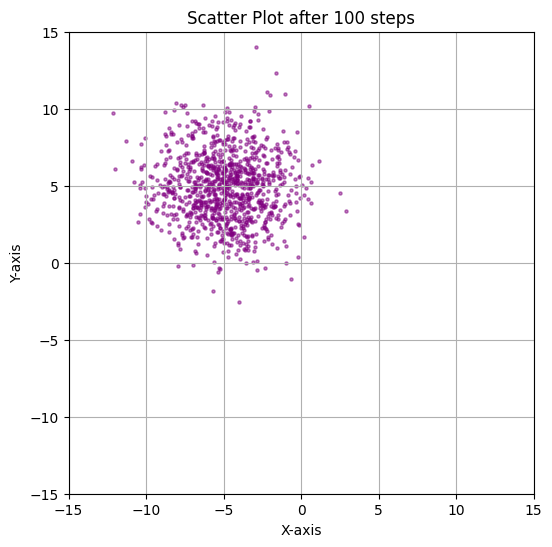

In [ ]:
initial_samples = generate_initial_samples(1000)
final_samples_1 = langevin_sampling([initial_samples], eps=0.5, steps=10)[-1]
final_samples_2 = langevin_sampling([initial_samples], eps=0.5, steps=20)[-1]
final_samples_3 = langevin_sampling([initial_samples], eps=0.5, steps=50)[-1]
final_samples_4 = langevin_sampling([initial_samples], eps=0.5, steps=100)[-1]

def plot_the_scatter_plot(final_samples, color, steps):
    plt.figure(figsize=(6, 6))
    plt.scatter(final_samples[:, 0], final_samples[:, 1], alpha=0.5, color=color, s=5)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Scatter Plot after " + str(steps) + " steps")
    plt.grid()
    plt.ylim(-15, 15)
    plt.xlim(-15, 15)
    plt.show()

plot_the_scatter_plot(final_samples_1, "blue", 10)
plot_the_scatter_plot(final_samples_2, "green", 20)
plot_the_scatter_plot(final_samples_3, "red", 50)
plot_the_scatter_plot(final_samples_4, "purple", 100)

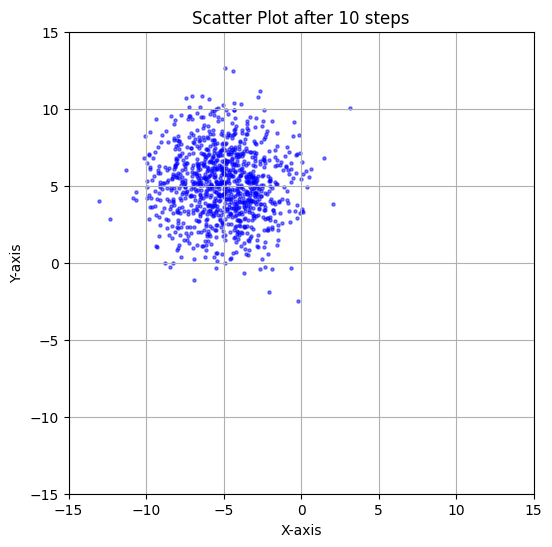

In [ ]:
def generate_random_samples(n_samples=1000):
    mean = np.array([-5, 5])
    cov = 5 * np.eye(2)  # Covariance matrix: 5 * Identity
    return np.random.multivariate_normal(mean, cov, size=n_samples)
points = generate_random_samples()
plot_the_scatter_plot(points, "blue", 0)


bold text#Bonus Question: Can langevin Dynamics algorithm be Used to Sample from a Mixture of Gaussians

In theory, we can indeed calculate the gradient of the log-density of this distribution. Therefore, we should be able to use this algorithm to sample from this distribution. However, in practice things are more complicated. As this distribution is multi-modal and we are using local gradients to traverse the space, we might always end up near one mode and never explore others. Hence, this algorithm doesn't perform well to sample from this distribution unless we generate the initial points in a particular way to overcome this challange which requires other techniques.